In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [173]:
red_df= pd.read_csv('winequality-red .csv', sep=';')
white_df= pd.read_csv('winequality-white.csv', sep=';')

# Dummy Variables (Red v. White)

In [314]:
red_df['type']= 1

In [316]:
white_df['type']= 2

In [349]:
wine_df = pd.concat([red_df, white_df])

In [350]:
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


In [351]:
type_dummy = pd.get_dummies(wine_df['type'],prefix = 'type_cat', drop_first=True)

In [352]:
type_dummy

,type_cat_2
0,0
1,0
2,0
3,0
4,0
...,...
4893,1
4894,1
4895,1
4896,1


In [353]:
wine_df_dummies = pd.concat([wine_df, type_dummy], axis = 1)

In [355]:
wine_df_dummies = wine_df_dummies.drop(columns='type')

In [356]:
wine_df_dummies

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [364]:
wine_df_dummies.to_csv('wine_df_dummies.csv')

# EDA

In [357]:
wine_df_dummies.describe() 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [358]:
wine_df_dummies.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


In [389]:
### ^ above make heatmap

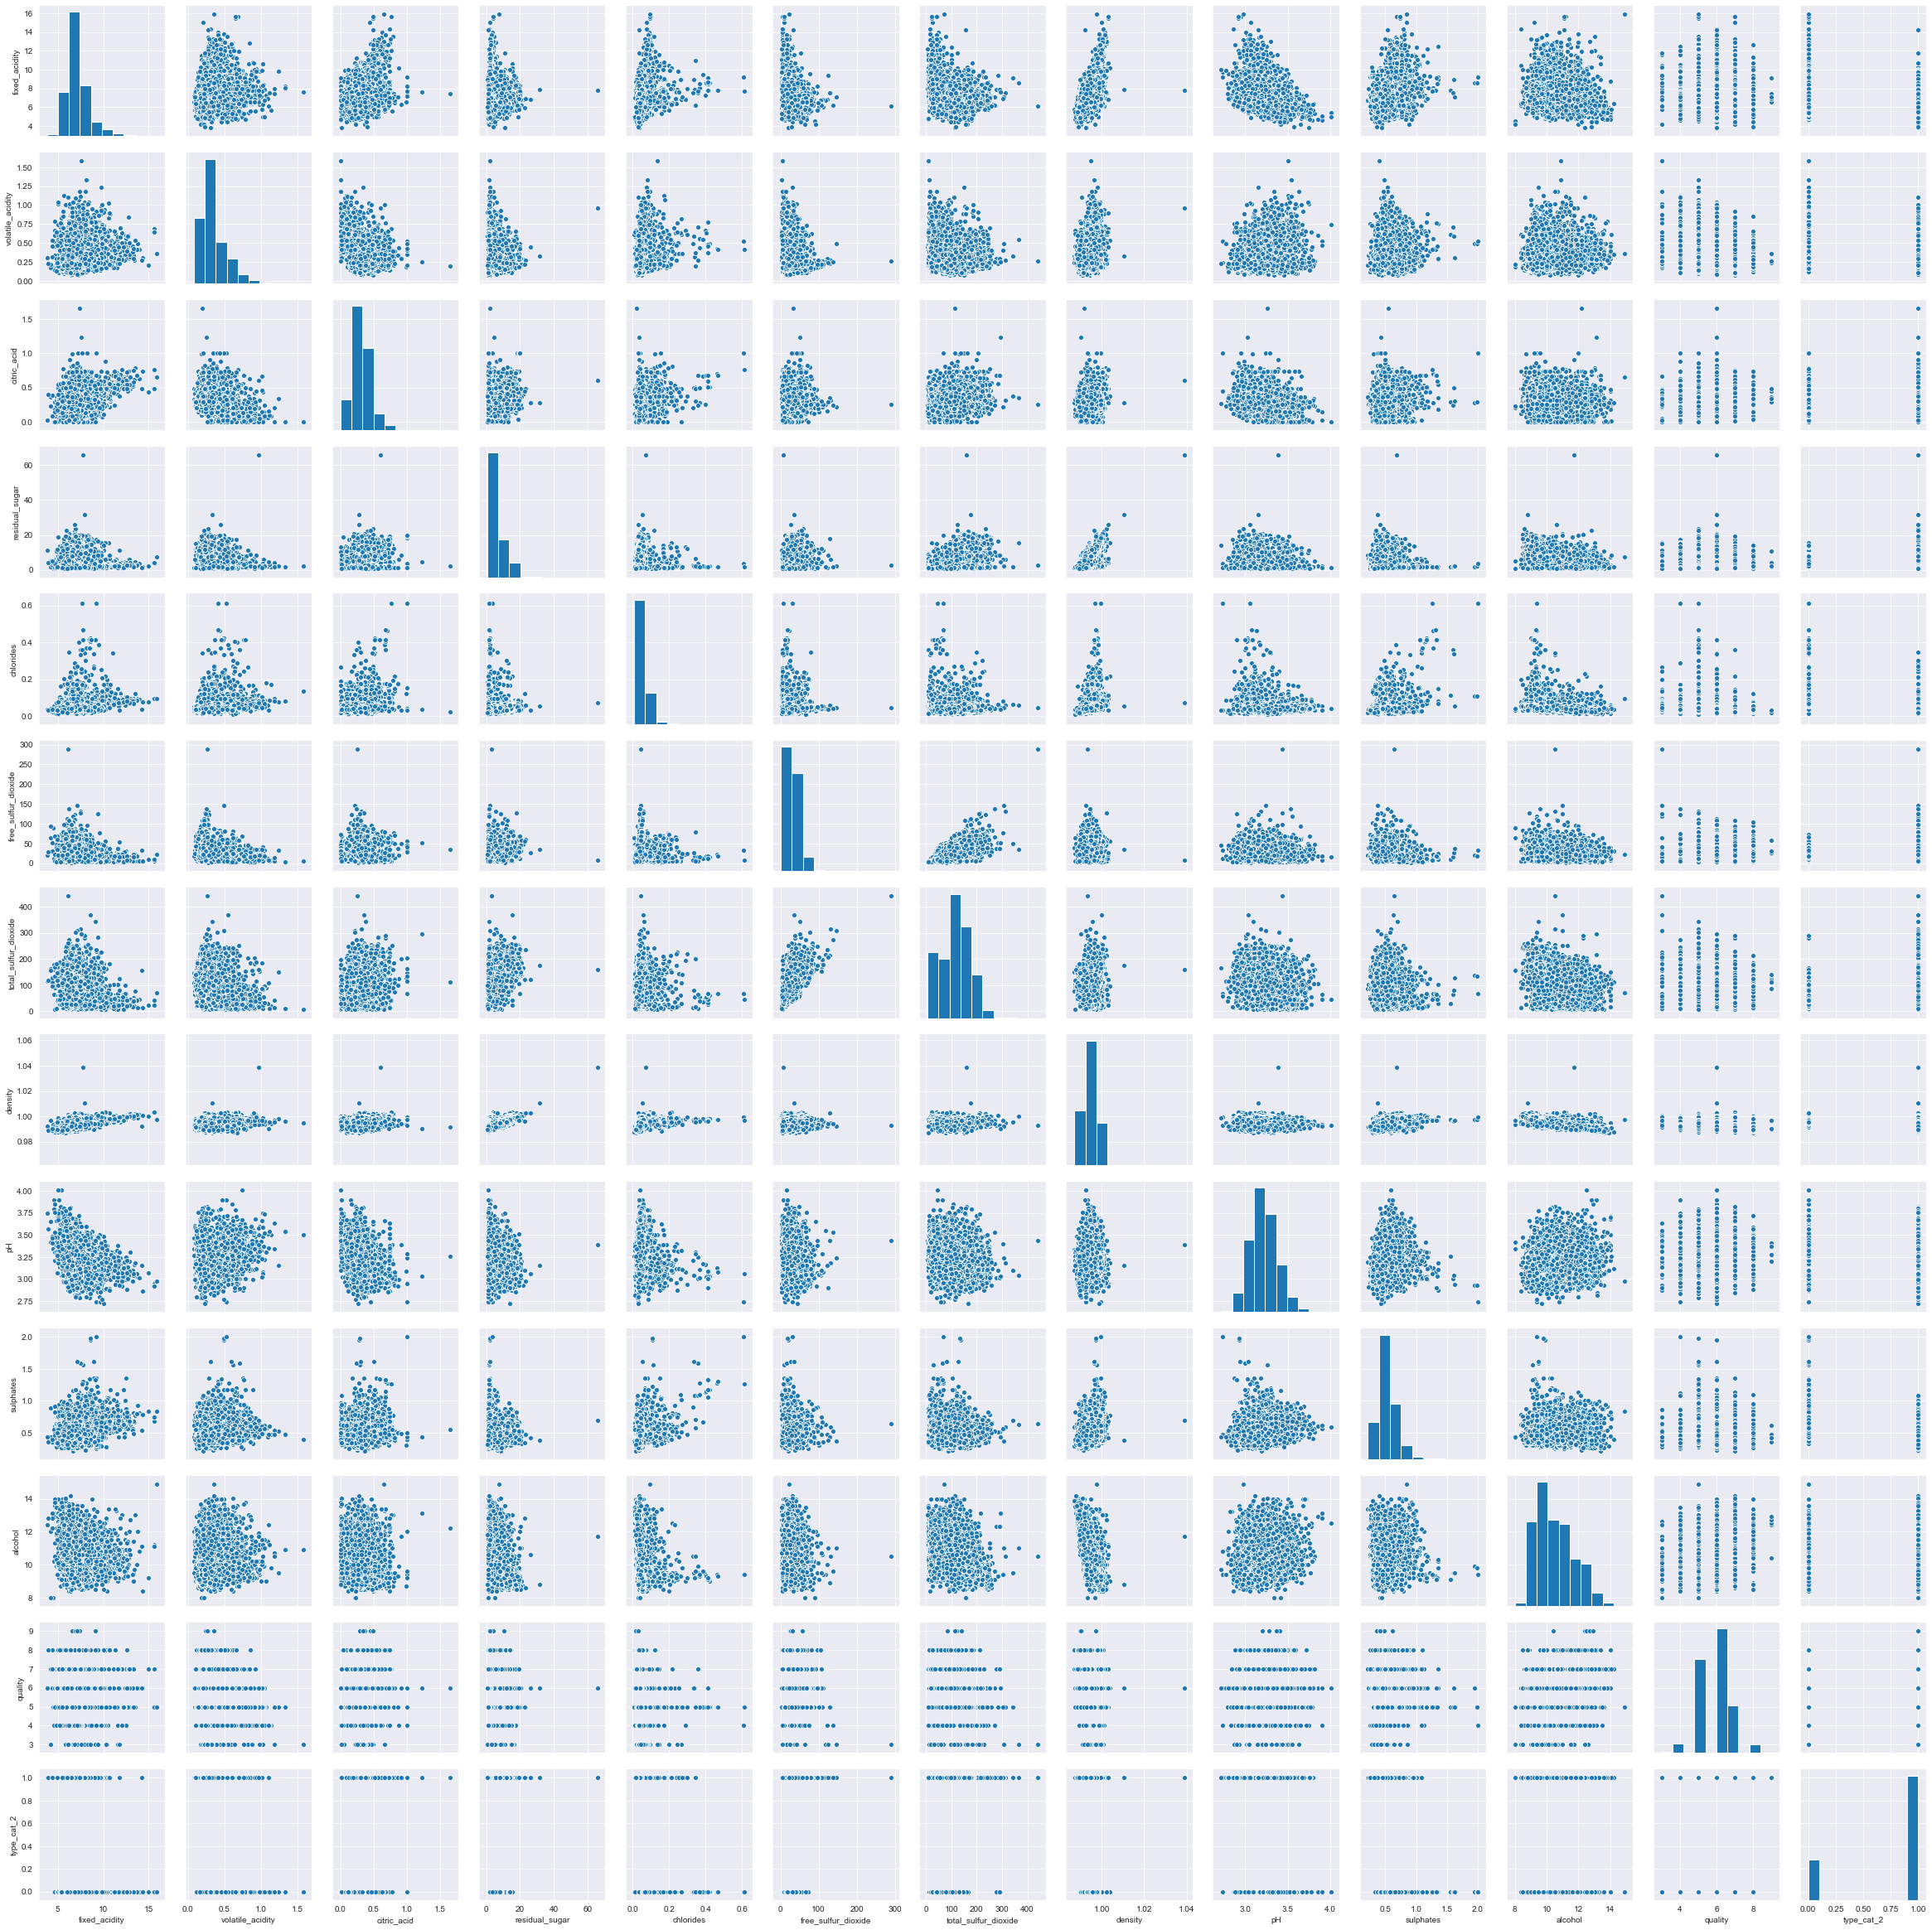

In [388]:
ww = sns.pairplot(wine_df_dummies)

In [359]:
data_pred = wine_df_dummies.drop(columns='quality')
data_pred.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_cat_2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


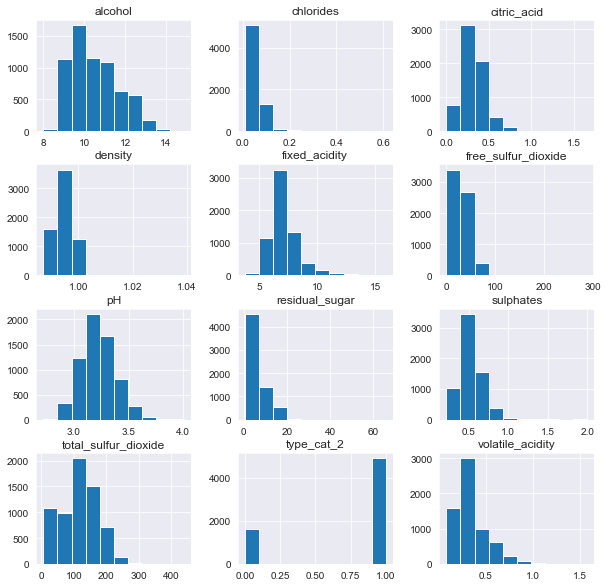

In [360]:
data_pred[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol','type_cat_2']].hist(figsize  = [10, 10]); 

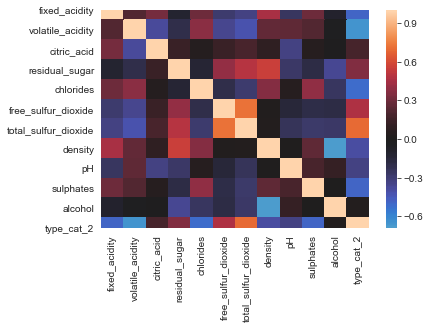

In [390]:
sns.heatmap(data_pred.corr(), center=0);

# Baseline Model

In [376]:
outcome = 'quality'
x_cols = list(wine_df_dummies.columns)
x_cols.remove(outcome)

In [377]:
train, test = train_test_split(wine_df_dummies)

In [378]:
print(len(train), len(test))
train.head()

4872 1625


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
3985,6.8,0.11,0.27,8.60,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,1
907,6.1,0.56,0.00,2.20,0.079,6.0,9.0,0.99480,3.59,0.54,11.5,6,0
2481,6.4,0.37,0.37,4.85,0.041,39.5,216.5,0.99432,3.10,0.50,9.8,6,1
4605,6.5,0.29,0.32,3.00,0.036,38.0,93.0,0.99060,3.16,0.59,12.0,6,1
1999,7.3,0.18,0.31,17.30,0.055,32.0,197.0,1.00020,3.13,0.46,9.0,6,1


In [379]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
print(predictors), (formula)

fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol+type_cat_2


(None,
 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol+type_cat_2')

In [380]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     171.1
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:24:19   Log-Likelihood:                -5415.2
No. Observations:                4872   AIC:                         1.086e+04
Df Residuals:                    4859   BIC:                         1.094e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              117.7964     16.270      7.240      0.000      85.899     149.693
fixed_acidity            0.0973      0.018      5.269      0.000       0.061       0.134
volatile_acidity        -1.5122      0.095    -15.986      0.000      -1.698      -1.327
citric_acid             -0.0019      0.094     -0.020      0.984      -0.187       0.183
residual_sugar           0.0691      0.007     10.057      0.000       0.056       0.083
chlorides               -0.8073      0.387     -2.085      0.037      -1.566      -0.048
free_sulfur_dioxide      0.0049      0.001      5.460      0.000       0.003       0.007
total_sulfur_dioxide    -0.0014      0.000     -3.699      0.000      -0.002      -0.001
density               -117.0559     16.509     -7.091      0.000    -149.420     -84.692
pH                       0.5264      0.105      5.005      0.000       0.320       0.733
sulphates                0.7532      0.089      8.485      0.000       0.579       0.927
alcohol                  0.2057      0.021      9.841      0.000       0.165       0.247
type_cat_2              -0.4104      0.065     -6.326      0.000      -0.538      -0.283
==============================================================================
Omnibus:                       95.535   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.837
Skew:                           0.029   Prob(JB):                     2.45e-44
Kurtosis:                       3.993   Cond. No.                     2.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Log Transformation

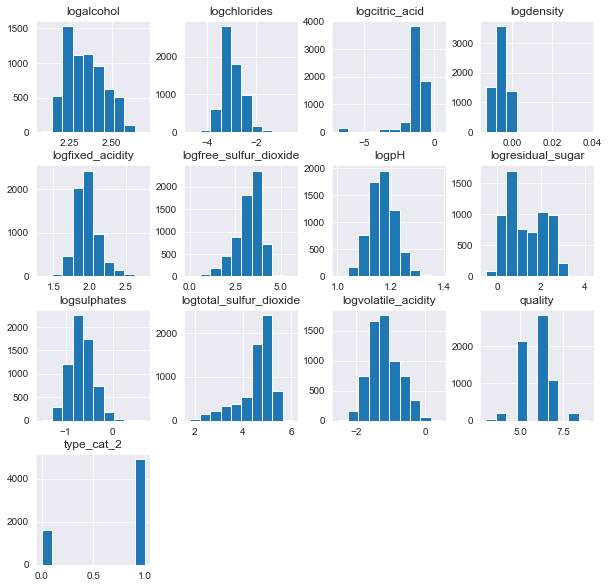

In [363]:
wine_df_dummies_log = pd.DataFrame([])
wine_df_dummies_log['quality'] = wine_df_dummies['quality']#.transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logfixed_acidity'] = wine_df_dummies['fixed_acidity'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001)) 
wine_df_dummies_log['logvolatile_acidity'] = wine_df_dummies['volatile_acidity'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logcitric_acid'] = wine_df_dummies['citric_acid'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logresidual_sugar'] = wine_df_dummies['residual_sugar'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logchlorides'] = wine_df_dummies['chlorides'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logfree_sulfur_dioxide'] = wine_df_dummies['free_sulfur_dioxide'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logtotal_sulfur_dioxide'] = wine_df_dummies['total_sulfur_dioxide'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logdensity'] = wine_df_dummies['density'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logpH'] = wine_df_dummies['pH'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logsulphates'] = wine_df_dummies['sulphates'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['logalcohol'] = wine_df_dummies['alcohol'].transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log['type_cat_2'] = wine_df_dummies['type_cat_2']#.transform(lambda x: np.log(x) if x!=0 else np.log(0.001))
wine_df_dummies_log.hist(figsize  = [10, 10]);

# Scaling

In [365]:
logfixed_acidity= wine_df_dummies_log['logfixed_acidity'] 
logvolatile_acidity= wine_df_dummies_log['logvolatile_acidity'] 
logcitric_acid= wine_df_dummies_log['logcitric_acid'] 
logresidual_sugar= wine_df_dummies_log['logresidual_sugar'] 
logchlorides= wine_df_dummies_log['logchlorides'] 
logfree_sulfur_dioxide= wine_df_dummies_log['logfree_sulfur_dioxide']
logtotal_sulfur_dioxide= wine_df_dummies_log['logtotal_sulfur_dioxide'] 
logdensity= wine_df_dummies_log['logdensity'] 
logpH= wine_df_dummies_log['logpH'] 
logsulphates= wine_df_dummies_log['logsulphates'] 
logalcohol =wine_df_dummies_log['logalcohol'] 
#wine_df_dummies_log['type_cat_2']

In [373]:
scaled_fixed_acidity = (logfixed_acidity - np.mean(logfixed_acidity))/(max(logfixed_acidity)-min(logfixed_acidity))
scaled_volatile_acidity = (logvolatile_acidity - np.mean(logvolatile_acidity))/(max(logvolatile_acidity)-min(logvolatile_acidity))
scaled_citric_acid = (logcitric_acid - np.mean(logcitric_acid))/(max(logcitric_acid)-min(logcitric_acid))
scaled_residual_sugar = (logresidual_sugar - np.mean(logresidual_sugar))/(max(logresidual_sugar)-min(logresidual_sugar))
scaled_chlorides = (logchlorides - np.mean(logchlorides))/(max(logchlorides)-min(logchlorides))
scaled_free_sulfur_dioxide = (logfree_sulfur_dioxide - np.mean(logfree_sulfur_dioxide))/(max(logfree_sulfur_dioxide)-min(logfree_sulfur_dioxide))
scaled_total_sulfur_dioxide = (logtotal_sulfur_dioxide - np.mean(logtotal_sulfur_dioxide))/(max(logtotal_sulfur_dioxide)-min(logtotal_sulfur_dioxide))
scaled_density = (logdensity - np.mean(logdensity))/(max(logdensity)-min(logdensity))
scaled_pH = (logpH - np.mean(logpH))/(max(logpH)-min(logpH))
scaled_sulphates = (logsulphates - np.mean(logsulphates))/(max(logsulphates)-min(logsulphates))
scaled_alcohol = (logalcohol - np.mean(logalcohol))/(max(logalcohol)-min(logalcohol))
scaled_quality = ((wine_df_dummies['quality'] - np.mean(wine_df_dummies['quality']))/(max(wine_df_dummies['quality'])-min(wine_df_dummies['quality'])))

In [374]:
data_scaled = pd.DataFrame([])
data_scaled['fixed_acidity'] = scaled_fixed_acidity
data_scaled['volatile_acidity'] = scaled_volatile_acidity
data_scaled['citric_acid'] = scaled_citric_acid
data_scaled['residual_sugar'] = scaled_residual_sugar
data_scaled['chlorides'] = scaled_chlorides
data_scaled['free_sulfur_dioxide'] = scaled_free_sulfur_dioxide
data_scaled['total_sulfur_dioxide'] = scaled_total_sulfur_dioxide
data_scaled['density'] = scaled_density
data_scaled['pH'] = scaled_pH
data_scaled['sulphates'] = scaled_sulphates
data_scaled['alcohol'] = scaled_alcohol
data_scaled['quality']=scaled_quality


In [381]:
data_scaled['type_cat_2'] = wine_df_dummies['type_cat_2']

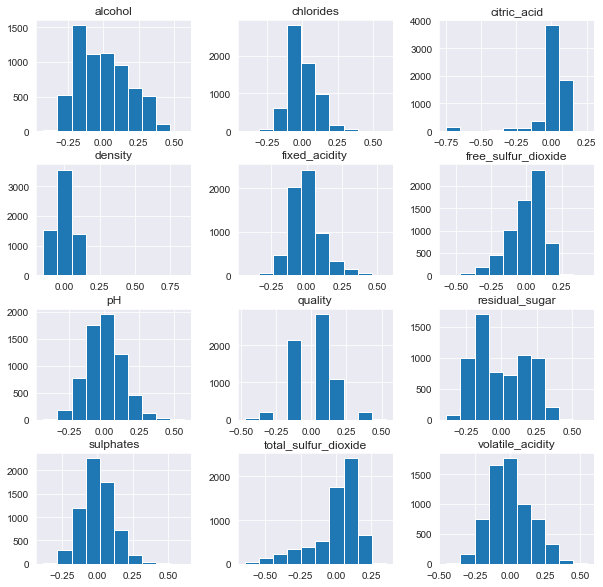

In [375]:
data_scaled.hist(figsize = [10, 10]);

In [447]:
#data_scaled = data_scaled.reset_index(drop=True) 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
0,0.027582,0.276090,-0.745404,-0.145579,0.098060,-0.144400,-0.241553,0.060914,0.226549,0.039415,-0.166593,-0.136396,0
1,0.064362,0.352801,-0.745404,-0.078807,0.158335,0.000485,-0.083618,0.041335,-0.011666,0.127377,-0.099587,-0.136396,0
2,0.064362,0.303657,-0.247887,-0.104907,0.143356,-0.089664,-0.133841,0.045252,0.036192,0.106935,-0.099587,-0.136396,0
3,0.317129,-0.031065,0.108042,-0.145579,0.094919,-0.067576,-0.109310,0.064827,-0.044072,0.055313,-0.099587,0.030270,0
4,0.027582,0.276090,-0.745404,-0.145579,0.098060,-0.144400,-0.241553,0.060914,0.226549,0.039415,-0.166593,-0.136396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.096032,-0.127501,0.019290,-0.182163,-0.060118,-0.006719,-0.009789,-0.069854,0.044082,-0.011928,0.115122,0.030270,1
4894,-0.052351,0.013697,0.048452,0.160457,-0.015881,0.145934,0.130414,0.004080,-0.052238,-0.049704,-0.132741,-0.136396,1
4895,-0.063018,-0.082739,-0.037741,-0.243405,-0.048261,0.032661,0.033922,-0.042293,-0.186536,-0.049704,-0.166593,0.030270,1
4896,-0.179732,-0.019302,0.023862,-0.261928,-0.195854,-0.038895,0.031815,-0.118181,0.098650,-0.136261,0.329830,0.196937,1


# Model - Post Log Transformation & Mean Normalization

In [382]:
outcome = 'quality'
x_cols = list(data_scaled.columns)
x_cols.remove(outcome)

In [383]:
train, test = train_test_split(data_scaled)

In [384]:
print(len(train), len(test))
train.head()

4872 1625


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
578,-0.063018,-0.031065,0.019290,-0.070773,-0.066276,0.007407,0.025377,-0.068672,0.083176,-0.101836,0.171546,0.196937,1
2466,0.036960,-0.043256,0.154450,0.245884,-0.054115,0.126305,0.117595,0.072456,-0.195167,-0.069843,-0.291025,-0.136396,1
734,-0.021295,0.071304,-0.000727,0.203659,-0.054115,0.020485,0.160288,0.047211,0.051949,0.078161,-0.201174,-0.136396,1
574,0.027582,-0.143856,0.036717,-0.145579,-0.085774,0.078963,0.084615,-0.072613,-0.035932,-0.069843,0.185348,0.196937,1
1274,0.116138,0.043736,0.108042,0.276526,-0.010889,0.139631,0.159066,0.090246,-0.118512,0.055313,-0.166593,0.030270,1


In [385]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
print(predictors), (formula)

fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol+type_cat_2


(None,
 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol+type_cat_2')

In [386]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     181.3
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:34:34   Log-Likelihood:                 3363.0
No. Observations:                4872   AIC:                            -6700.
Df Residuals:                    4859   BIC:                            -6616.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0274      0.008      3.425      0.001       0.012       0.043
fixed_acidity            0.0714      0.027      2.632      0.009       0.018       0.125
volatile_acidity        -0.2568      0.017    -15.215      0.000      -0.290      -0.224
citric_acid              0.0422      0.015      2.794      0.005       0.013       0.072
residual_sugar           0.1645      0.020      8.428      0.000       0.126       0.203
chlorides               -0.0979      0.026     -3.837      0.000      -0.148      -0.048
free_sulfur_dioxide      0.2675      0.024     11.006      0.000       0.220       0.315
total_sulfur_dioxide    -0.1774      0.024     -7.327      0.000      -0.225      -0.130
density                 -0.4475      0.094     -4.753      0.000      -0.632      -0.263
pH                       0.0541      0.019      2.825      0.005       0.017       0.092
sulphates                0.1357      0.018      7.511      0.000       0.100       0.171
alcohol                  0.2842      0.019     14.957      0.000       0.247       0.321
type_cat_2              -0.0367      0.010     -3.543      0.000      -0.057      -0.016
==============================================================================
Omnibus:                       95.479   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.680
Skew:                           0.095   Prob(JB):                     1.76e-41
Kurtosis:                       3.943   Cond. No.                         72.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multicollinearity

In [393]:
outcome = 'quality'
x_cols = list(data_scaled.columns)
x_cols.remove(outcome)
x_cols.remove('total_sulfur_dioxide')

In [394]:
train, test = train_test_split(data_scaled)

In [395]:
print(len(train), len(test))
train.head()

4872 1625


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
2301,-0.052351,-0.111906,0.014557,0.247658,0.033977,0.000485,0.061579,0.075781,0.182129,-0.059662,-0.166593,-0.136396,1
1344,0.018076,-0.097005,0.052147,-0.145579,-0.048261,0.126305,0.126219,-0.076554,0.036192,-0.113023,0.252635,0.363604,1
4074,-0.052351,0.043736,-0.037741,0.218346,0.042015,-0.089664,-0.036580,0.023305,-0.068647,-0.136261,-0.083262,-0.303063,1
1379,-0.021295,0.135348,-0.030823,-0.304648,0.017035,-0.283545,0.063434,-0.052919,-0.093459,-0.090919,-0.004038,0.030270,1
3462,-0.031494,-0.198335,0.040743,-0.134660,-0.054115,0.074378,0.033922,-0.092326,0.020338,-0.059662,0.342343,0.030270,1


In [396]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
print(predictors), (formula)

fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+density+pH+sulphates+alcohol+type_cat_2


(None,
 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+density+pH+sulphates+alcohol+type_cat_2')

In [397]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     193.1
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        08:33:43   Log-Likelihood:                 3366.9
No. Observations:                4872   AIC:                            -6710.
Df Residuals:                    4860   BIC:                            -6632.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0597      0.007      8.883      0.000       0.047       0.073
fixed_acidity           0.0663      0.027      2.450      0.014       0.013       0.119
volatile_acidity       -0.2815      0.016    -17.393      0.000      -0.313      -0.250
citric_acid             0.0328      0.015      2.144      0.032       0.003       0.063
residual_sugar          0.1632      0.019      8.375      0.000       0.125       0.201
chlorides              -0.1043      0.025     -4.149      0.000      -0.154      -0.055
free_sulfur_dioxide     0.1210      0.018      6.724      0.000       0.086       0.156
density                -0.4371      0.093     -4.681      0.000      -0.620      -0.254
pH                      0.0513      0.019      2.676      0.007       0.014       0.089
sulphates               0.1281      0.018      7.149      0.000       0.093       0.163
alcohol                 0.3086      0.019     16.480      0.000       0.272       0.345
type_cat_2             -0.0778      0.009     -9.039      0.000      -0.095      -0.061
==============================================================================
Omnibus:                      107.810   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.653
Skew:                           0.076   Prob(JB):                     8.21e-51
Kurtosis:                       4.055   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Feature Engineering

Polynomial & Interaction using SKLearn (sklearn.preprocessing.polynomialfeatures)

In [398]:
from sklearn.preprocessing import PolynomialFeatures

In [404]:
poly = PolynomialFeatures(2)

In [401]:
scaled_pred_data = data_scaled.drop(columns=['quality','type_cat_2','total_sulfur_dioxide'])

In [402]:
scaled_pred_data.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.027582,0.276090,-0.745404,-0.145579,0.098060,-0.144400,0.060914,0.226549,0.039415,-0.166593
1,0.064362,0.352801,-0.745404,-0.078807,0.158335,0.000485,0.041335,-0.011666,0.127377,-0.099587


In [409]:
poly_pred_data = poly.fit_transform(scaled_pred_data)

In [414]:
print('The transformed feature names are: {}'.format(poly.get_feature_names()))
#print('------------------')
#print('The first row of transformed data is: {}'.format(poly_pred_data[0]))

The transformed feature names are: ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x7^2', 'x7 x8', 'x7 x9', 'x8^2', 'x8 x9', 'x9^2']


In [487]:
poly_int_df = pd.DataFrame(poly_pred_data)

In [488]:
dum_cols =['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x7^2', 'x7 x8', 'x7 x9', 'x8^2', 'x8 x9', 'x9^2']

In [489]:
fix_cols =['1', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed_acidity_2', 'fixed_acidity__volatile_acidity', 'fixed_acidity__citric_acid', 'fixed_acidity__residual_sugar', 'fixed_acidity__chlorides', 'fixed_acidity__free_sulfur_dioxide', 'fixed_acidity__density', 'fixed_acidity__pH', 'fixed_acidity__sulphates', 'fixed_acidity__alcohol', 'volatile_acidity_2', 'volatile_acidity__citric_acid', 'volatile_acidity__residual_sugar', 'volatile_acidity__chlorides', 'volatile_acidity__free_sulfur_dioxide', 'volatile_acidity__density', 'volatile_acidity__pH', 'volatile_acidity__sulphates', 'volatile_acidity__alcohol', 'citric_acid_2', 'citric_acid__residual_sugar', 'citric_acid__chlorides', 'citric_acid__free_sulfur_dioxide', 'citric_acid__density', 'citric_acid__pH', 'citric_acid__sulphates', 'citric_acid__alcohol', 'residual_sugar_2', 'residual_sugar__chlorides', 'residual_sugar__free_sulfur_dioxide', 'residual_sugar__density', 'residual_sugar__pH', 'residual_sugar__sulphates', 'residual_sugar__alcohol', 'chlorides_2', 'chlorides__free_sulfur_dioxide', 'chlorides__density', 'chlorides__pH', 'chlorides__sulphates', 'chlorides__alcohol', 'free_sulfur_dioxide_2', 'free_sulfur_dioxide__density', 'free_sulfur_dioxide__pH', 'free_sulfur_dioxide__sulphates', 'free_sulfur_dioxide__alcohol', 'density_2', 'density__pH', 'density__sulphates', 'density__alcohol', 'pH_2', 'pH__sulphates', 'pH__alcohol', 'sulphates_2', 'sulphates__alcohol', 'alcohol_2']



In [490]:
poly_int_df.columns=fix_cols

In [491]:
poly_int_df

,1,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,...,density_2,density__pH,density__sulphates,density__alcohol,pH_2,pH__sulphates,pH__alcohol,sulphates_2,sulphates__alcohol,alcohol_2
0,1.0,0.027582,0.276090,-0.745404,-0.145579,0.098060,-0.144400,0.060914,0.226549,0.039415,...,0.003710,0.013800,0.002401,-0.010148,0.051324,0.008929,-0.037741,0.001554,-0.006566,0.027753
1,1.0,0.064362,0.352801,-0.745404,-0.078807,0.158335,0.000485,0.041335,-0.011666,0.127377,...,0.001709,-0.000482,0.005265,-0.004116,0.000136,-0.001486,0.001162,0.016225,-0.012685,0.009917
2,1.0,0.064362,0.303657,-0.247887,-0.104907,0.143356,-0.089664,0.045252,0.036192,0.106935,...,0.002048,0.001638,0.004839,-0.004507,0.001310,0.003870,-0.003604,0.011435,-0.010649,0.009917
3,1.0,0.317129,-0.031065,0.108042,-0.145579,0.094919,-0.067576,0.064827,-0.044072,0.055313,...,0.004203,-0.002857,0.003586,-0.006456,0.001942,-0.002438,0.004389,0.003060,-0.005508,0.009917
4,1.0,0.027582,0.276090,-0.745404,-0.145579,0.098060,-0.144400,0.060914,0.226549,0.039415,...,0.003710,0.013800,0.002401,-0.010148,0.051324,0.008929,-0.037741,0.001554,-0.006566,0.027753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,-0.096032,-0.127501,0.019290,-0.182163,-0.060118,-0.006719,-0.069854,0.044082,-0.011928,...,0.004880,-0.003079,0.000833,-0.008042,0.001943,-0.000526,0.005075,0.000142,-0.001373,0.013253
6493,1.0,-0.052351,0.013697,0.048452,0.160457,-0.015881,0.145934,0.004080,-0.052238,-0.049704,...,0.000017,-0.000213,-0.000203,-0.000542,0.002729,0.002596,0.006934,0.002470,0.006598,0.017620
6494,1.0,-0.063018,-0.082739,-0.037741,-0.243405,-0.048261,0.032661,-0.042293,-0.186536,-0.049704,...,0.001789,0.007889,0.002102,0.007046,0.034796,0.009272,0.031076,0.002470,0.008280,0.027753
6495,1.0,-0.179732,-0.019302,0.023862,-0.261928,-0.195854,-0.038895,-0.118181,0.098650,-0.136261,...,0.013967,-0.011658,0.016103,-0.038980,0.009732,-0.013442,0.032538,0.018567,-0.044943,0.108788


In [ ]:
####

In [492]:
poly_int_df['quality']=scaled_quality.values

In [493]:
poly_int_df['type_cat_2'] = wine_df_dummies['type_cat_2'].values

In [494]:
poly_int_df

,1,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,...,density__sulphates,density__alcohol,pH_2,pH__sulphates,pH__alcohol,sulphates_2,sulphates__alcohol,alcohol_2,quality,type_cat_2
0,1.0,0.027582,0.276090,-0.745404,-0.145579,0.098060,-0.144400,0.060914,0.226549,0.039415,...,0.002401,-0.010148,0.051324,0.008929,-0.037741,0.001554,-0.006566,0.027753,-0.136396,0
1,1.0,0.064362,0.352801,-0.745404,-0.078807,0.158335,0.000485,0.041335,-0.011666,0.127377,...,0.005265,-0.004116,0.000136,-0.001486,0.001162,0.016225,-0.012685,0.009917,-0.136396,0
2,1.0,0.064362,0.303657,-0.247887,-0.104907,0.143356,-0.089664,0.045252,0.036192,0.106935,...,0.004839,-0.004507,0.001310,0.003870,-0.003604,0.011435,-0.010649,0.009917,-0.136396,0
3,1.0,0.317129,-0.031065,0.108042,-0.145579,0.094919,-0.067576,0.064827,-0.044072,0.055313,...,0.003586,-0.006456,0.001942,-0.002438,0.004389,0.003060,-0.005508,0.009917,0.030270,0
4,1.0,0.027582,0.276090,-0.745404,-0.145579,0.098060,-0.144400,0.060914,0.226549,0.039415,...,0.002401,-0.010148,0.051324,0.008929,-0.037741,0.001554,-0.006566,0.027753,-0.136396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,-0.096032,-0.127501,0.019290,-0.182163,-0.060118,-0.006719,-0.069854,0.044082,-0.011928,...,0.000833,-0.008042,0.001943,-0.000526,0.005075,0.000142,-0.001373,0.013253,0.030270,1
6493,1.0,-0.052351,0.013697,0.048452,0.160457,-0.015881,0.145934,0.004080,-0.052238,-0.049704,...,-0.000203,-0.000542,0.002729,0.002596,0.006934,0.002470,0.006598,0.017620,-0.136396,1
6494,1.0,-0.063018,-0.082739,-0.037741,-0.243405,-0.048261,0.032661,-0.042293,-0.186536,-0.049704,...,0.002102,0.007046,0.034796,0.009272,0.031076,0.002470,0.008280,0.027753,0.030270,1
6495,1.0,-0.179732,-0.019302,0.023862,-0.261928,-0.195854,-0.038895,-0.118181,0.098650,-0.136261,...,0.016103,-0.038980,0.009732,-0.013442,0.032538,0.018567,-0.044943,0.108788,0.196937,1


In [495]:
outcome = 'quality'
x_cols = list(poly_int_df.columns)
x_cols.remove(outcome)

In [496]:
train, test = train_test_split(poly_int_df)

In [497]:
print(len(train), len(test))
train.head()

4872 1625


,1,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,...,density__sulphates,density__alcohol,pH_2,pH__sulphates,pH__alcohol,sulphates_2,sulphates__alcohol,alcohol_2,quality,type_cat_2
1211,1.0,-0.052351,0.120447,-0.069622,-0.124273,0.098060,-0.022074,0.019775,0.083176,0.085527,...,0.001691,-0.003634,0.006918,0.007114,-0.015287,0.007315,-0.015719,0.033779,-0.136396,0
3464,1.0,0.046214,0.053179,0.075516,0.168294,0.385060,0.020485,0.021736,-0.076891,-0.080258,...,-0.001744,-0.000766,0.005912,0.006171,0.002711,0.006441,0.002830,0.001243,0.030270,1
871,1.0,-0.021295,0.201289,-0.286686,-0.195902,0.127367,0.064837,0.010360,0.241187,0.047434,...,0.000491,0.000275,0.058171,0.011440,0.006413,0.002250,0.001261,0.000707,-0.136396,0
2119,1.0,0.073262,-0.161050,0.004562,-0.124273,-0.060118,-0.200600,-0.009663,-0.135350,0.165685,...,-0.001601,0.000962,0.018320,-0.022426,0.013479,0.027452,-0.016500,0.009917,-0.136396,1
2232,1.0,-0.118941,-0.019302,-0.030823,0.257159,-0.026191,0.104217,0.049169,0.090925,-0.090919,...,-0.004470,-0.007355,0.008267,-0.008267,-0.013600,0.008266,0.013599,0.022374,-0.136396,1


In [498]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
print(predictors)

1+fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+density+pH+sulphates+alcohol+fixed_acidity_2+fixed_acidity__volatile_acidity+fixed_acidity__citric_acid+fixed_acidity__residual_sugar+fixed_acidity__chlorides+fixed_acidity__free_sulfur_dioxide+fixed_acidity__density+fixed_acidity__pH+fixed_acidity__sulphates+fixed_acidity__alcohol+volatile_acidity_2+volatile_acidity__citric_acid+volatile_acidity__residual_sugar+volatile_acidity__chlorides+volatile_acidity__free_sulfur_dioxide+volatile_acidity__density+volatile_acidity__pH+volatile_acidity__sulphates+volatile_acidity__alcohol+citric_acid_2+citric_acid__residual_sugar+citric_acid__chlorides+citric_acid__free_sulfur_dioxide+citric_acid__density+citric_acid__pH+citric_acid__sulphates+citric_acid__alcohol+residual_sugar_2+residual_sugar__chlorides+residual_sugar__free_sulfur_dioxide+residual_sugar__density+residual_sugar__pH+residual_sugar__sulphates+residual_sugar__alcohol+chlorides_2+chlorides__free

In [500]:
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     41.76
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:05:00   Log-Likelihood:                 3626.3
No. Observations:                4872   AIC:                            -7119.
Df Residuals:                    4805   BIC:                            -6684.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.0572      0.009      6.055      0.000       0.039       0.076
fixed_acidity                             0.1992      0.036      5.547      0.000       0.129       0.270
volatile_acidity                         -0.2913      0.017    -16.798      0.000      -0.325      -0.257
citric_acid                              -0.0436      0.036     -1.204      0.229      -0.115       0.027
residual_sugar                            0.2506      0.029      8.592      0.000       0.193       0.308
chlorides                                -0.1271      0.032     -4.006      0.000      -0.189      -0.065
free_sulfur_dioxide                       0.0803      0.020      3.991      0.000       0.041       0.120
density                                  -1.2596      0.164     -7.678      0.000      -1.581      -0.938
pH                                        0.1044      0.024      4.389      0.000       0.058       0.151
sulphates                                 0.1625      0.020      8.183      0.000       0.124       0.201
alcohol                                   0.1328      0.027      4.874      0.000       0.079       0.186
fixed_acidity_2                          -0.5145      0.275     -1.873      0.061      -1.053       0.024
fixed_acidity__volatile_acidity           0.0725      0.260      0.278      0.781      -0.438       0.582
fixed_acidity__citric_acid                0.2773      0.321      0.864      0.388      -0.352       0.907
fixed_acidity__residual_sugar            -0.4378      0.277     -1.579      0.114      -0.981       0.106
fixed_acidity__chlorides                 -0.8756      0.371     -2.362      0.018      -1.602      -0.149
fixed_acidity__free_sulfur_dioxide        0.2491      0.280      0.888      0.374      -0.301       0.799
fixed_acidity__density                    1.5234      1.084      1.405      0.160      -0.602       3.649
fixed_acidity__pH                         0.4707      0.343      1.373      0.170      -0.201       1.143
fixed_acidity__sulphates                  0.3826      0.292      1.309      0.191      -0.191       0.956
fixed_acidity__alcohol                    0.3492      0.237      1.476      0.140      -0.115       0.813
volatile_acidity_2                        0.0887      0.091      0.979      0.327      -0.089       0.266
volatile_acidity__citric_acid             0.3404      0.183      1.864      0.062      -0.018       0.698
volatile_acidity__residual_sugar          0.0099      0.173      0.057      0.955      -0.329       0.349
volatile_acidity__chlorides              -0.1407      0.215     -0.653      0.513      -0.563       0.281
volatile_acidity__free_sulfur_dioxide     0.0394      0.152      0.260      0.795      -0.258       0.336
volatile_

then Lasso or Ridge to fix overfit

# Validation

cross validation

In [ ]:
from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()
#linreg.fit(X_train, y_train)

#y_hat_train = linreg.predict(X_train)
#y_hat_test = linreg.predict(X_test)

In [ ]:
#train_residuals = y_hat_train - y_train
#test_residuals = y_hat_test - y_test

In [ ]:
from sklearn.metrics import mean_squared_error

#train_mse = mean_squared_error(y_train, y_hat_train)
#test_mse = mean_squared_error(y_test, y_hat_test)
#print('Train Mean Squarred Error:', train_mse)
#print('Test Mean Squarred Error:', test_mse)

# ###################################################################

# #

# ** Everything Below is Unused Scrap Material

# Old Play Around Code (Unused)

In [292]:
red_df_log

,quality,logfixed_acidity,logvolatile_acidity,logcitric_acid,logresidual_sugar,logchlorides,logfree_sulfur_dioxide,logtotal_sulfur_dioxide,logdensity,logpH,logsulphates,logalcohol
0,5,2.001480,-0.356675,0.000000,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710
1,5,2.054124,-0.127833,0.000000,0.955511,-2.322788,3.218876,4.204693,-0.003205,1.163151,-0.385662,2.282382
2,5,2.054124,-0.274437,-3.218876,0.832909,-2.385967,2.708050,3.988984,-0.003005,1.181727,-0.430783,2.282382
3,6,2.415914,-1.272966,-0.579818,0.641854,-2.590267,2.833213,4.094345,-0.002002,1.150572,-0.544727,2.282382
4,5,2.001480,-0.356675,0.000000,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5,1.824549,-0.510826,-2.525729,0.693147,-2.407946,3.465736,3.784190,-0.005113,1.238374,-0.544727,2.351375
1595,6,1.774952,-0.597837,-2.302585,0.788457,-2.780621,3.663562,3.931826,-0.004892,1.258461,-0.274437,2.415914
1596,6,1.840550,-0.673345,-2.040221,0.832909,-2.577022,3.367296,3.688879,-0.004269,1.229641,-0.287682,2.397895
1597,5,1.774952,-0.438505,-2.120264,0.693147,-2.590267,3.465736,3.784190,-0.004540,1.272566,-0.342490,2.322388


In [310]:
outcome = 'quality'
x_cols = list(red_df_log.columns)
x_cols.remove(outcome)

In [311]:
train, test = train_test_split(red_df_log)

In [312]:
print(len(train), len(test))
train.head()

1199 400


,quality,logfixed_acidity,logvolatile_acidity,logcitric_acid,logresidual_sugar,logchlorides,logfree_sulfur_dioxide,logtotal_sulfur_dioxide,logdensity,logpH,logsulphates,logalcohol
1038,7,2.163323,-0.891598,-0.891598,1.824549,-2.551046,3.218876,3.737670,-0.004711,1.175573,-0.261365,2.533697
883,5,1.974081,-0.510826,-3.218876,0.916291,-2.577022,2.890372,4.477337,-0.002553,1.261298,-0.597837,2.251292
1304,5,2.028148,-0.235722,-1.560648,0.832909,-2.441847,3.044522,4.219508,-0.004510,1.137833,-0.820981,2.219203
1305,5,2.014903,-0.494296,-1.347074,0.641854,-2.617296,3.178054,4.477337,-0.003888,1.193922,-0.634878,2.282382
107,5,1.824549,-0.462035,-1.171183,0.530628,-2.430418,2.708050,4.158883,-0.003105,1.241269,-0.235722,2.230014


In [313]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     57.37
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          6.53e-102
Time:                        15:31:52   Log-Likelihood:                -1200.9
No. Observations:                1199   AIC:                             2426.
Df Residuals:                    1187   BIC:                             2487.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.3637      1.179      0.309      0.758      -1.949       2.676
logfixed_acidity            0.1395      0.266      0.525      0.600      -0.382       0.661
logvolatile_acidity        -0.4797      0.069     -6.905      0.000      -0.616      -0.343
logcitric_acid             -0.0039      0.014     -0.273      0.785      -0.032       0.024
logresidual_sugar           0.0253      0.076      0.335      0.738      -0.123       0.174
logchlorides               -0.2635      0.069     -3.816      0.000      -0.399      -0.128
logfree_sulfur_dioxide      0.1165      0.047      2.478      0.013       0.024       0.209
logtotal_sulfur_dioxide    -0.1588      0.049     -3.261      0.001      -0.254      -0.063
logdensity                -20.2585     28.029     -0.723      0.470     -75.251      34.734
logpH                      -1.2595      0.789     -1.597      0.111      -2.807       0.288
logsulphates                0.8061      0.102      7.886      0.000       0.606       1.007
logalcohol                  2.5796      0.348      7.416      0.000       1.897       3.262
==============================================================================
Omnibus:                       22.143   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.931
Skew:                          -0.211   Prob(JB):                     3.17e-07
Kurtosis:                       3.649   Cond. No.                     9.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Scaling (****SKLearn Unused)

In [197]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(test)

In [ ]:
#print(scaled_data)

# Modeling (Unused)

In [263]:
outcome = 'quality'
x_cols = list(red_df.columns)
x_cols.remove(outcome)

In [264]:
train, test = train_test_split(red_df)

In [265]:
print(len(train), len(test))
train.head()

1199 400


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
21,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.9982,3.52,0.65,9.7,5
518,10.9,0.21,0.49,2.8,0.088,11.0,32.0,0.9972,3.22,0.68,11.7,6
42,7.5,0.49,0.20,2.6,0.332,8.0,14.0,0.9968,3.21,0.90,10.5,6
1412,8.2,0.24,0.34,5.1,0.062,8.0,22.0,0.9974,3.22,0.94,10.9,6
1438,7.0,0.59,0.00,1.7,0.052,3.0,8.0,0.9960,3.41,0.47,10.3,5


In [266]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
print(predictors), (formula)

fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol


(None,
 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol')

In [262]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     61.86
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          1.02e-108
Time:                        14:40:40   Log-Likelihood:                -1200.6
No. Observations:                1199   AIC:                             2425.
Df Residuals:                    1187   BIC:                             2486.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               24.4236     25.393      0.962      0.336     -25.397      74.245
fixed_acidity            0.0392      0.030      1.286      0.199      -0.021       0.099
volatile_acidity        -1.1477      0.143     -8.014      0.000      -1.429      -0.867
citric_acid             -0.2821      0.178     -1.581      0.114      -0.632       0.068
residual_sugar           0.0322      0.019      1.700      0.089      -0.005       0.069
chlorides               -2.0066      0.501     -4.004      0.000      -2.990      -1.023
free_sulfur_dioxide      0.0043      0.002      1.743      0.082      -0.001       0.009
total_sulfur_dioxide    -0.0032      0.001     -3.830      0.000      -0.005      -0.002
density                -20.5041     25.903     -0.792      0.429     -71.326      30.317
pH                      -0.4142      0.229     -1.812      0.070      -0.863       0.034
sulphates                0.9367      0.135      6.940      0.000       0.672       1.201
alcohol                  0.2828      0.032      8.898      0.000       0.220       0.345
==============================================================================
Omnibus:                       23.351   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.948
Skew:                          -0.185   Prob(JB):                     2.58e-08
Kurtosis:                       3.750   Cond. No.                     1.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""